In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv(r"C:\Users\lenovo\Desktop\assignments\5 multi linear reg\cars.csv",encoding="ISO-8859-1")

In [3]:
df

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


In [4]:
from statsmodels.graphics.regressionplots import influence_plot
import matplotlib.pyplot as plt

In [9]:
data=df.drop(['Id','Model','Mfg_Month','Mfg_Year','Fuel_Type','Met_Color','Color','Automatic','Cylinders','Mfr_Guarantee','BOVAG_Guarantee','Guarantee_Period','ABS','Airbag_1','Airbag_2','Airco','Automatic_airco','Boardcomputer','CD_Player','Central_Lock','Powered_Windows','Power_Steering','Radio','Mistlamps','Sport_Model','Backseat_Divider','Metallic_Rim','Radio_cassette','Tow_Bar'], axis=1)

In [10]:
data

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [11]:
data.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


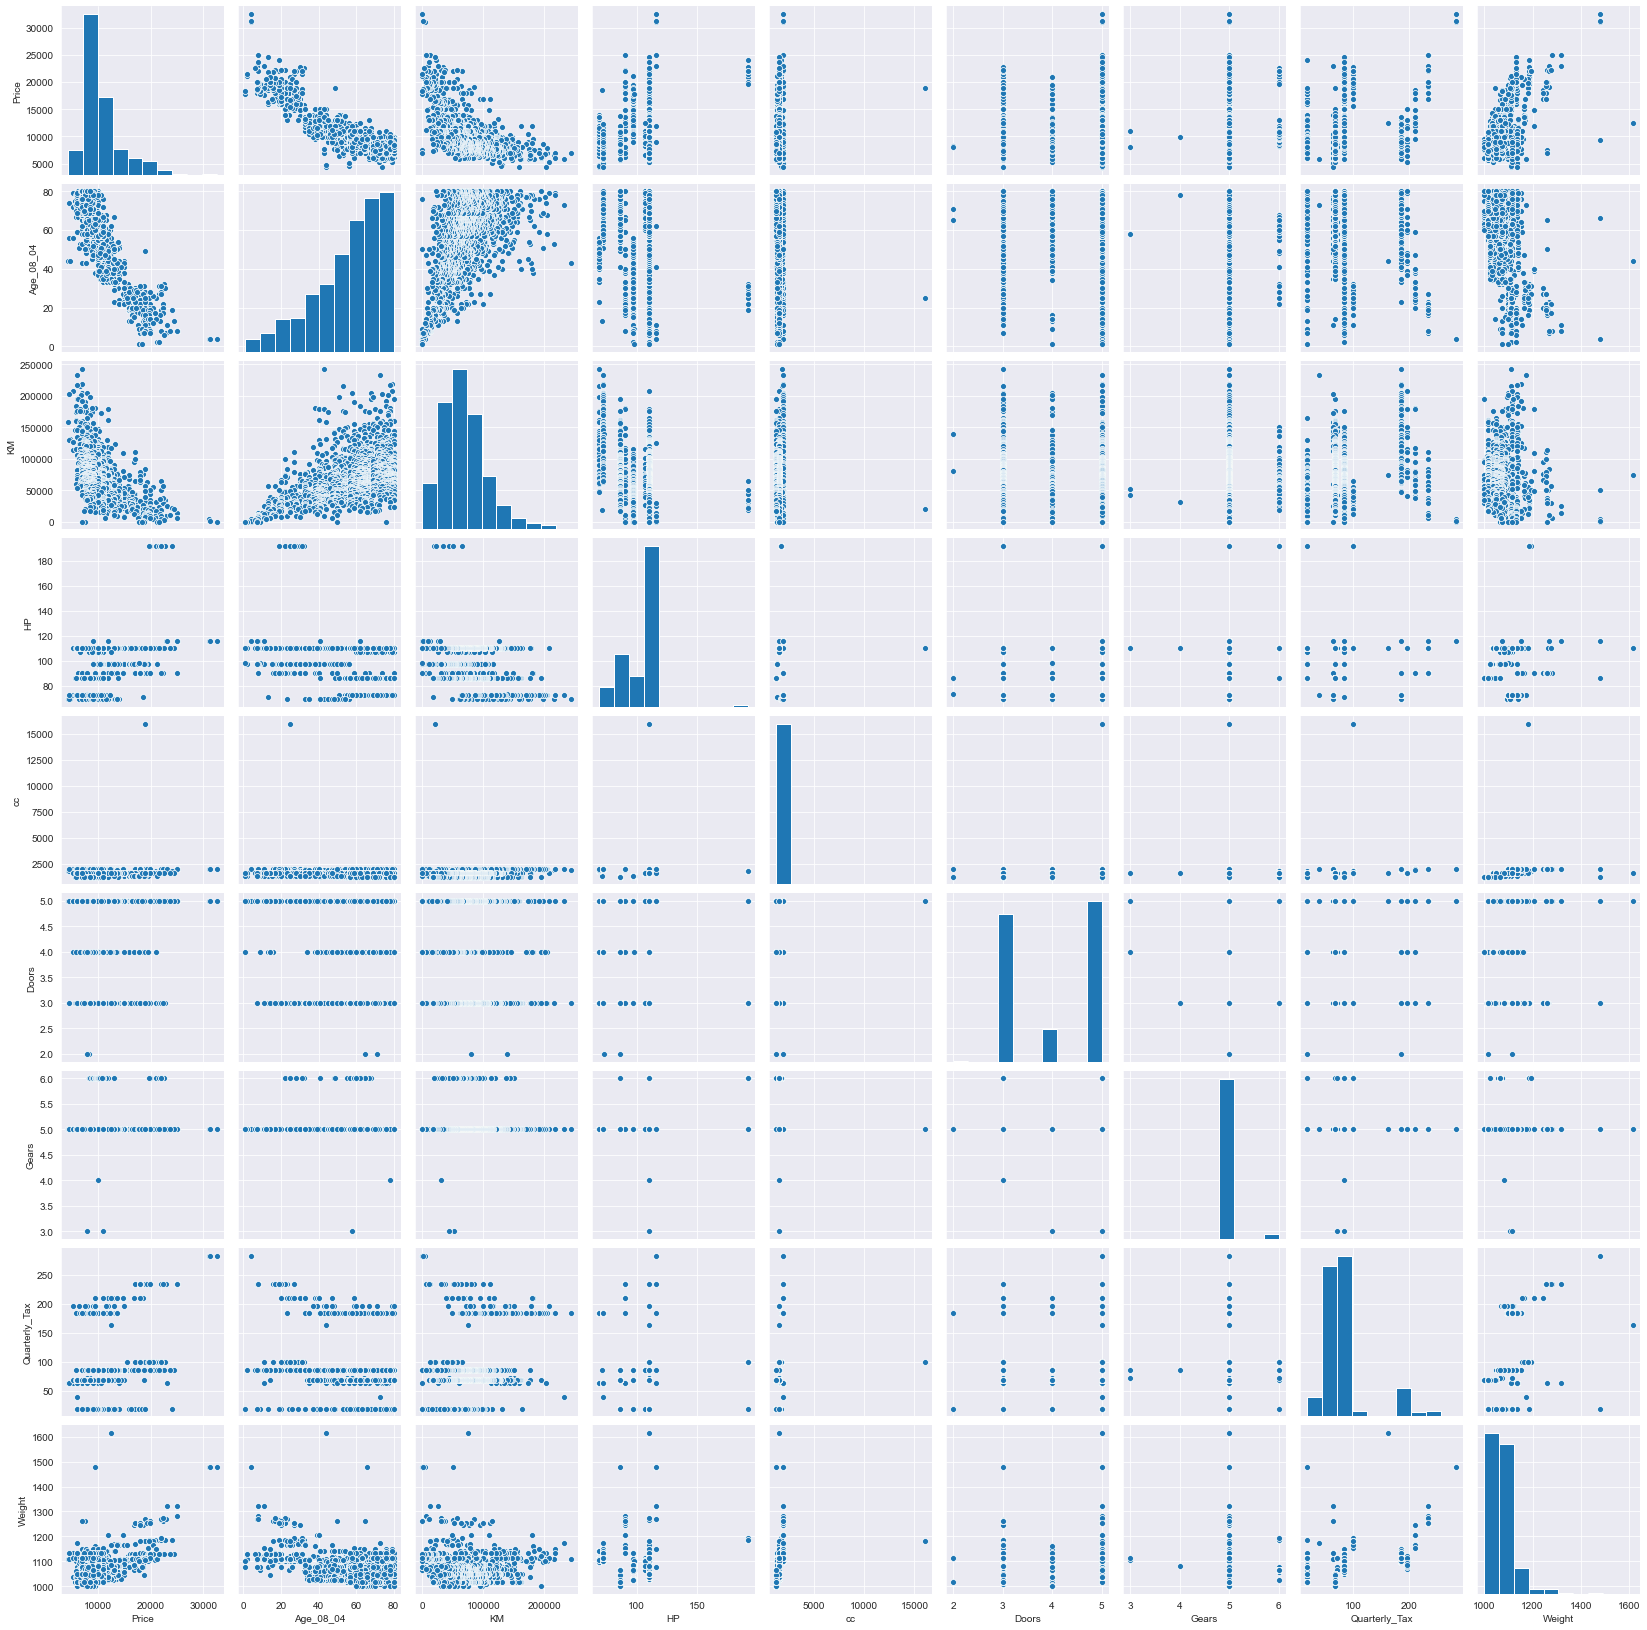

In [12]:
import seaborn as sns
sns.set_style(style='darkgrid')
sns.pairplot(data)

In [13]:
data[data.duplicated()]

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [17]:
datanew = data.drop([113], axis=0)

In [18]:
datanew[datanew.duplicated()]

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight


In [19]:
datanew.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1435 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1435 non-null   int64
 1   Age_08_04      1435 non-null   int64
 2   KM             1435 non-null   int64
 3   HP             1435 non-null   int64
 4   cc             1435 non-null   int64
 5   Doors          1435 non-null   int64
 6   Gears          1435 non-null   int64
 7   Quarterly_Tax  1435 non-null   int64
 8   Weight         1435 non-null   int64
dtypes: int64(9)
memory usage: 112.1 KB


In [20]:
datanew.describe()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,10720.915679,55.980488,68571.782578,101.491986,1576.560976,4.032753,5.026481,87.020209,1072.287108
std,3608.732978,18.563312,37491.094553,14.981408,424.387533,0.952667,0.188575,40.959588,52.251882
min,4350.000000,1.000000,1.000000,69.000000,1300.000000,2.000000,3.000000,19.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.000000,3.000000,5.000000,69.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,1600.000000,4.000000,5.000000,85.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,1600.000000,5.000000,5.000000,85.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,16000.000000,5.000000,6.000000,283.000000,1615.000000


In [22]:
import statsmodels.formula.api as smf
model1=smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=datanew).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1118.
Date:                Thu, 31 Dec 2020   Prob (F-statistic):               0.00
Time:                        15:30:41   Log-Likelihood:                -12366.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1426   BIC:                         2.480e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5472.5404   1412.169     -3.875      0.000   -8242.692   -2702.389
Age_08_04      -121.7139      2.615    -46.552      0.000    -126.843    -116.585
KM               -0.0207      0.001    -16.552      0.000      -0.023      -0.018
HP               31.5846      2.818     11.210      0.000      26.058      37.112
cc               -0.1186      0.090     -1.316      0.188      -0.295       0.058
Doors            -0.9202     39.988     -0.023      0.982     -79.362      77.522
Gears           597.7159    196.969      3.035      0.002     211.335     984.097
Quarterly_Tax     3.8588      1.311      2.944      0.003       1.288       6.430
Weight           16.8555      1.069     15.761      0.000      14.758      18.953
==============================================================================
Omnibus:                      149.666   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1000.538
Skew:                          -0.204   Prob(JB):                    5.44e-218
Kurtosis:                       7.070   Cond. No.                     3.13e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
model1.params

Intercept       -5472.540368
Age_08_04        -121.713891
KM                 -0.020737
HP                 31.584612
cc                 -0.118558
Doors              -0.920189
Gears             597.715894
Quarterly_Tax       3.858805
Weight             16.855470
dtype: float64

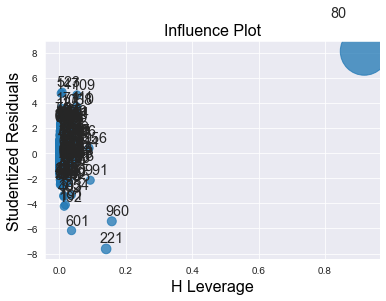

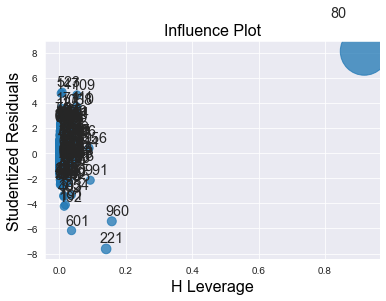

In [24]:
influence_plot(model1)

In [53]:
rsq_age = smf.ols('Age_08_04~KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=datanew).fit().rsquared  
vif_age = 1/(1-rsq_age)

rsq_km = smf.ols('KM~Age_08_04+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=datanew).fit().rsquared  
vif_km = 1/(1-rsq_km)

rsq_hp = smf.ols('HP~Age_08_04+KM+cc+Doors+Gears+Quarterly_Tax+Weight',data=datanew).fit().rsquared  
vif_hp = 1/(1-rsq_hp)

rsq_cc = smf.ols('cc~Age_08_04+KM+HP+Doors+Gears+Quarterly_Tax+Weight',data=datanew).fit().rsquared  
vif_cc = 1/(1-rsq_cc)

rsq_doors = smf.ols('Doors~Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight',data=datanew).fit().rsquared  
vif_doors = 1/(1-rsq_doors)

rsq_gears = smf.ols('Gears~Age_08_04+KM+HP+cc+Doors+Quarterly_Tax+Weight',data=datanew).fit().rsquared  
vif_gears = 1/(1-rsq_gears)

rsq_tax = smf.ols('Quarterly_Tax~Age_08_04+KM+HP+cc+Doors+Gears+Weight',data=datanew).fit().rsquared  
vif_tax = 1/(1-rsq_tax)

rsq_weight = smf.ols('Weight~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax',data=datanew).fit().rsquared  
vif_weight = 1/(1-rsq_weight)

In [54]:
d1 = {'Variables':['Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight'],'VIF':[vif_age,vif_km,vif_hp,vif_cc,vif_doors,vif_gears,vif_tax,vif_weight]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,Age_08_04,1.876236
1,KM,1.757178
2,HP,1.419180
3,cc,1.163470
4,Doors,1.155890
5,Gears,1.098843
6,Quarterly_Tax,2.295375
7,Weight,2.487180


<function matplotlib.pyplot.show(*args, **kw)>

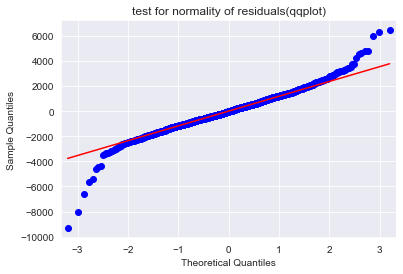

In [58]:
import statsmodels.api as sm
res = model1.resid
plot = sm.qqplot(res,line ='q')
plt.title("test for normality of residuals(qqplot)")
plt.show

In [59]:
list(np.where(model1.resid>4000))

[array([ 109,  110,  111,  124,  146,  170,  522, 1057], dtype=int64)]

In [60]:
list(np.where(model1.resid<-4000))

[array([190, 191, 220, 392, 401, 600, 653, 959], dtype=int64)]

In [61]:
newdata = datanew.drop([ 109,  110,  111,  124,  146,  170,  522, 1057,190, 191, 220, 392, 401, 600, 653, 959], axis=0)

In [63]:
newdata.head(125)

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
5,12950,32,61000,90,2000,3,5,210,1170
6,16900,27,94612,90,2000,3,5,210,1245
7,18600,30,75889,90,2000,3,5,210,1245
8,21500,27,19700,192,1800,3,5,100,1185
9,12950,23,71138,69,1900,3,5,185,1105


In [64]:
model1_new=smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=newdata).fit()
model1_new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     1071.
Date:                Sun, 03 Jan 2021   Prob (F-statistic):               0.00
Time:                        16:00:08   Log-Likelihood:                -12193.
No. Observations:                1419   AIC:                         2.440e+04
Df Residuals:                    1410   BIC:                         2.445e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -3313.3629   1411.719     -2.347      0.019   -6082.659    -544.067
Age_08_04      -124.1359      2.590    -47.933      0.000    -129.216    -119.056
KM               -0.0195      0.001    -15.578      0.000      -0.022      -0.017
HP               30.8955      2.762     11.185      0.000      25.477      36.314
cc               -0.0559      0.088     -0.634      0.526      -0.229       0.117
Doors            24.3692     39.287      0.620      0.535     -52.697     101.436
Gears           641.2445    192.281      3.335      0.001     264.057    1018.432
Quarterly_Tax     3.1476      1.289      2.443      0.015       0.620       5.676
Weight           14.6098      1.092     13.379      0.000      12.468      16.752
==============================================================================
Omnibus:                      108.149   Durbin-Watson:                   1.562
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              544.593
Skew:                          -0.094   Prob(JB):                    5.54e-119
Kurtosis:                       6.029   Cond. No.                     3.18e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.18e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [65]:
model1_new.params

Intercept       -3313.362861
Age_08_04        -124.135950
KM                 -0.019453
HP                 30.895509
cc                 -0.055902
Doors              24.369192
Gears             641.244488
Quarterly_Tax       3.147647
Weight             14.609784
dtype: float64

In [66]:
model_influence=model1.get_influence()
(c,_) = model_influence.cooks_distance

In [67]:
c

array([7.22221054e-03, 3.94547973e-03, 5.44224039e-03, ...,
       8.04110550e-07, 6.99854767e-04, 1.08408002e-02])

<ipython-input-73-3575ecaa59b6>:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(datanew)),np.round(c,3))


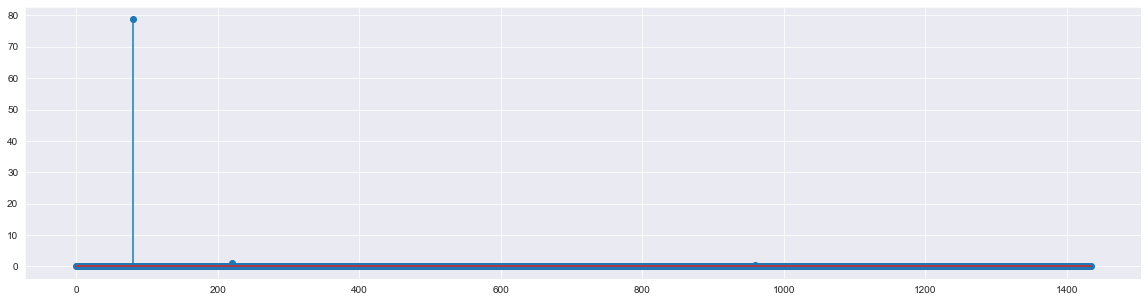

In [73]:
fig = plt.subplots(figsize=(20,5))
plt.stem(np.arange(len(datanew)),np.round(c,3))
plt.show()

In [74]:
np.argmax(c),np.max(c)

(80, 78.72950582247589)

In [76]:
datanew[datanew.index.isin([80])]

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
80,18950,25,20019,110,16000,5,5,100,1180


In [78]:
datanew.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [79]:
newdata1=datanew.drop(datanew.index[80],axis=0)

In [81]:
ml=smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=newdata1).fit()
ml.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     1172.
Date:                Sun, 03 Jan 2021   Prob (F-statistic):               0.00
Time:                        16:26:57   Log-Likelihood:                -12326.
No. Observations:                1434   AIC:                         2.467e+04
Df Residuals:                    1425   BIC:                         2.472e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -6197.9334   1383.989     -4.478      0.000   -8912.808   -3483.059
Age_08_04      -120.5074      2.561    -47.048      0.000    -125.532    -115.483
KM               -0.0178      0.001    -13.931      0.000      -0.020      -0.015
HP               39.2245      2.912     13.470      0.000      33.512      44.937
cc               -2.5088      0.307     -8.162      0.000      -3.112      -1.906
Doors           -26.5129     39.235     -0.676      0.499    -103.478      50.452
Gears           527.1292    192.832      2.734      0.006     148.864     905.395
Quarterly_Tax     8.9414      1.427      6.268      0.000       6.143      11.740
Weight           20.0627      1.118     17.944      0.000      17.869      22.256
==============================================================================
Omnibus:                      242.181   Durbin-Watson:                   1.595
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2635.168
Skew:                          -0.427   Prob(JB):                         0.00
Kurtosis:                       9.586   Cond. No.                     3.14e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.14e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<ipython-input-82-763229344d58>:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(newdata1)),np.round(c,3))


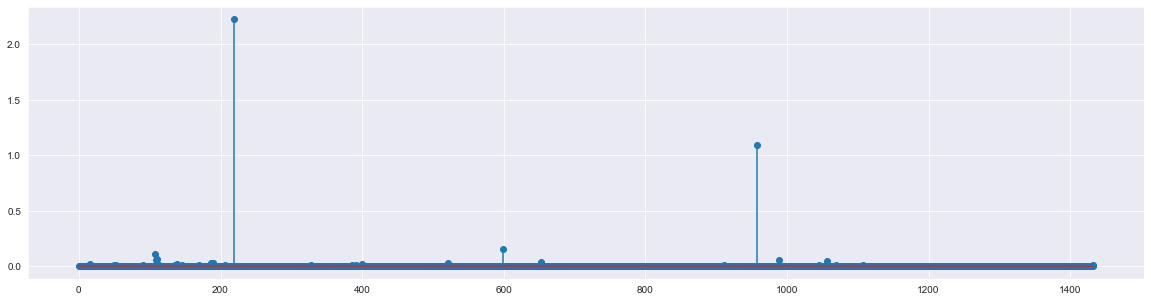

In [82]:
ml_influence=ml.get_influence()
(c,_) = ml_influence.cooks_distance
c
fig = plt.subplots(figsize=(20,5))
plt.stem(np.arange(len(newdata1)),np.round(c,3))
plt.show()

In [83]:
np.argmax(c),np.max(c)

(219, 2.225351365527161)

In [84]:
newdata2=newdata1.drop(newdata1.index[219],axis=0)

In [87]:
ml2=smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=newdata2).fit()
ml2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     1264.
Date:                Sun, 03 Jan 2021   Prob (F-statistic):               0.00
Time:                        16:34:06   Log-Likelihood:                -12270.
No. Observations:                1433   AIC:                         2.456e+04
Df Residuals:                    1424   BIC:                         2.461e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.018e+04   1398.103     -7.279      0.000   -1.29e+04   -7433.579
Age_08_04      -116.6301      2.509    -46.483      0.000    -121.552    -111.708
KM               -0.0172      0.001    -13.935      0.000      -0.020      -0.015
HP               39.2081      2.818     13.916      0.000      33.681      44.735
cc               -3.1922      0.305    -10.455      0.000      -3.791      -2.593
Doors           -64.7218     38.159     -1.696      0.090    -139.577      10.133
Gears           487.4310    186.626      2.612      0.009     121.340     853.522
Quarterly_Tax     7.8987      1.384      5.706      0.000       5.183      10.614
Weight           24.9584      1.189     20.983      0.000      22.625      27.292
==============================================================================
Omnibus:                      195.629   Durbin-Watson:                   1.639
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1736.249
Skew:                          -0.308   Prob(JB):                         0.00
Kurtosis:                       8.357   Cond. No.                     3.27e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.27e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<ipython-input-88-2ae116c8b55b>:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(newdata2)),np.round(c,3))


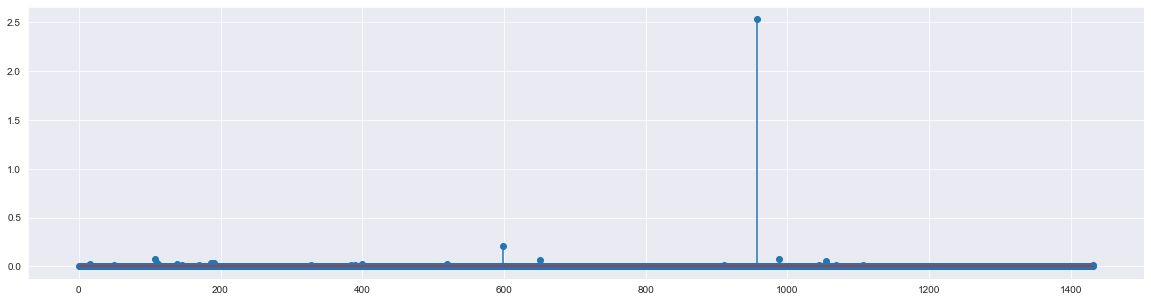

In [88]:
ml2_influence=ml2.get_influence()
(c,_) = ml2_influence.cooks_distance
c
fig = plt.subplots(figsize=(20,5))
plt.stem(np.arange(len(newdata2)),np.round(c,3))
plt.show()

In [89]:
np.argmax(c),np.max(c)

(957, 2.5307796232780126)

In [90]:
newdata3=newdata2.drop(newdata2.index[957],axis=0)

In [91]:
ml3=smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=newdata3).fit()
ml3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     1355.
Date:                Sun, 03 Jan 2021   Prob (F-statistic):               0.00
Time:                        16:36:37   Log-Likelihood:                -12218.
No. Observations:                1432   AIC:                         2.445e+04
Df Residuals:                    1423   BIC:                         2.450e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.468e+04   1436.358    -10.222      0.000   -1.75e+04   -1.19e+04
Age_08_04      -112.0629      2.481    -45.176      0.000    -116.929    -107.197
KM               -0.0170      0.001    -14.135      0.000      -0.019      -0.015
HP               36.5587      2.747     13.308      0.000      31.170      41.947
cc               -3.7852      0.303    -12.508      0.000      -4.379      -3.192
Doors          -121.9808     37.498     -3.253      0.001    -195.539     -48.423
Gears           466.6014    181.031      2.577      0.010     111.485     821.718
Quarterly_Tax     5.1754      1.373      3.770      0.000       2.482       7.869
Weight           30.5667      1.295     23.595      0.000      28.025      33.108
==============================================================================
Omnibus:                      121.369   Durbin-Watson:                   1.701
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              700.907
Skew:                          -0.078   Prob(JB):                    6.31e-153
Kurtosis:                       6.424   Cond. No.                     3.46e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.46e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<ipython-input-92-5dd4108a0606>:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(newdata3)),np.round(c,3))


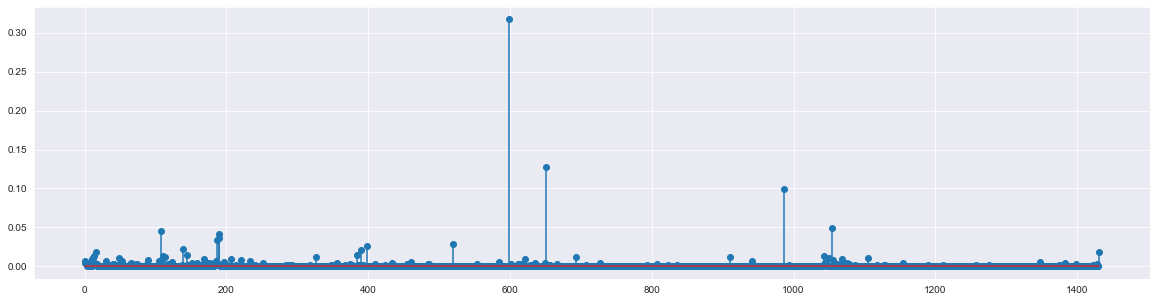

In [92]:
ml3_influence=ml3.get_influence()
(c,_) = ml3_influence.cooks_distance
c
fig = plt.subplots(figsize=(20,5))
plt.stem(np.arange(len(newdata3)),np.round(c,3))
plt.show()

In [93]:
np.argmax(c),np.max(c)

(598, 0.3168903540143586)

In [94]:
newdata4=newdata3.drop(newdata3.index[598],axis=0)

In [95]:
ml4=smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=newdata4).fit()
ml4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     1413.
Date:                Sun, 03 Jan 2021   Prob (F-statistic):               0.00
Time:                        16:40:22   Log-Likelihood:                -12182.
No. Observations:                1431   AIC:                         2.438e+04
Df Residuals:                    1422   BIC:                         2.443e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.613e+04   1423.155    -11.333      0.000   -1.89e+04   -1.33e+04
Age_08_04      -110.3700      2.445    -45.135      0.000    -115.167    -105.573
KM               -0.0177      0.001    -14.951      0.000      -0.020      -0.015
HP               34.2632      2.714     12.625      0.000      28.940      39.587
cc               -3.6790      0.297    -12.372      0.000      -4.262      -3.096
Doors          -143.5437     36.919     -3.888      0.000    -215.965     -71.122
Gears           469.5788    177.682      2.643      0.008     121.033     818.125
Quarterly_Tax     3.6472      1.363      2.676      0.008       0.973       6.321
Weight           32.1321      1.289     24.931      0.000      29.604      34.660
==============================================================================
Omnibus:                       75.132   Durbin-Watson:                   1.727
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              254.049
Skew:                           0.122   Prob(JB):                     6.82e-56
Kurtosis:                       5.050   Cond. No.                     3.49e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.49e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<ipython-input-97-e1170736601d>:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(newdata4)),np.round(c,3))


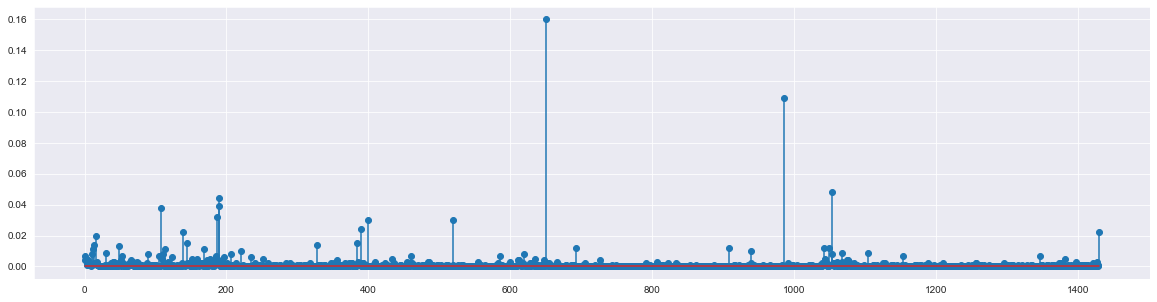

In [97]:
ml4_influence=ml4.get_influence()
(c,_) = ml4_influence.cooks_distance
c
fig = plt.subplots(figsize=(20,5))
plt.stem(np.arange(len(newdata4)),np.round(c,3))
plt.show()

In [98]:
np.argmax(c),np.max(c)

(650, 0.16028069686028304)

In [99]:
ml4.predict(newdata4)

0       16345.352610
1       15886.635544
2       16328.224968
3       15996.318854
4       15883.424182
            ...     
1431     9161.230587
1432     8536.091326
1433     8681.531063
1434     8793.668694
1435    10860.695492
Length: 1431, dtype: float64

In [100]:
ml4.rsquared

0.8882395145171202